In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels
import statsmodels.api as sm

In [4]:
df = pd.read_csv("C:/Dokumen/1. SAINS DATA/SEMESTER 4/Machine Learning/RTM 1/penempatan_kerja.csv")
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


Note :
1. sl_no = Nomor seri
2. gender = Jenis Kelamin- Laki-laki = 'M', Perempuan = 'F'
3. ssc_p = Persentase Pendidikan Menengah- Kelas 10
4. ssc_b = Dewan Pendidikan- Pusat / Lainnya
5. hsc_p = Persentase Pendidikan Menengah Tinggi- Kelas 12
6. hsc_b = Dewan Pendidikan- Pusat / Lainnya
7. hs_s = = Spesialisasi dalam Pendidikan Menengah Tinggi
8. degree_p = Persentase Gelar
9. degree_t	= Di bawah Wisuda (Jenis gelar) - Bidang pendidikan gelar
11. workerex = Pengalaman Kerja
12. etest_p = Persentase tes kelayakan kerja (dilakukan oleh perguruan tinggi)
13. specialisation = Pasca Kelulusan (MBA)- Spesialisasi
14. mba_p = Persentase MBA
15. status = Status penempatan- Ditempatkan/Tidak ditempatkan
16. salary = Gaji yang ditawarkan oleh perusahaan kepada kandidat

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


terdapat missing value pada kolom salary sebanyak 67, total data yaitu sebanyak 215. Memiliki berbagai type yaitu float, Integer, dan objek

In [6]:
df.shape

(215, 15)

In [7]:
df.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

In [8]:
df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [9]:
df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

#### Jumlah laki laki dan perempuan pada data

In [10]:
df['gender'].value_counts()

gender
M    139
F     76
Name: count, dtype: int64

#### Jumlah yang memiliki pengalaman dan tidak memiliki pengalaman kerja pada data

In [11]:
df['workex'].value_counts()

workex
No     141
Yes     74
Name: count, dtype: int64

#### Jumlah mahasiswa yang telah diterima pada perusahaan pada data

In [12]:
df['status'].value_counts()

status
Placed        148
Not Placed     67
Name: count, dtype: int64

#### Jumlah jenis - jenis specialisation pada data

In [13]:
df['specialisation'].value_counts()

specialisation
Mkt&Fin    120
Mkt&HR      95
Name: count, dtype: int64

#### Rata rata salary yang didapat dari pengalaman kerja

In [14]:
df['salary'].groupby(df['workex']) .mean()

workex
No     277523.809524
Yes    303265.625000
Name: salary, dtype: float64

terlihat jika orang yang telah memiliki pengalaman kerja memiliki gaji rata rata lebih banyak dari pada yang tidak bekerja.

#### Rata rata salary dari setiap bidang 

In [15]:
df.groupby('specialisation')['salary'].mean()

specialisation
Mkt&Fin    298852.631579
Mkt&HR     270377.358491
Name: salary, dtype: float64

Untuk gaji rata rata lebih banyak pada bidang Mkt&Fin sehingga tidak menutup kemungkinan banyak orang dari specialisation marketing&finace lebih banyak, dari pada marketing dan human recouse

# VISUALISASI

Untuk membuat visualisasi data tentang kolom 'status' dari suatu dataframe (df). Visualisasi ini terdiri dari dua bagian yang ditampilkan yaitu bar plot dan pie-chart

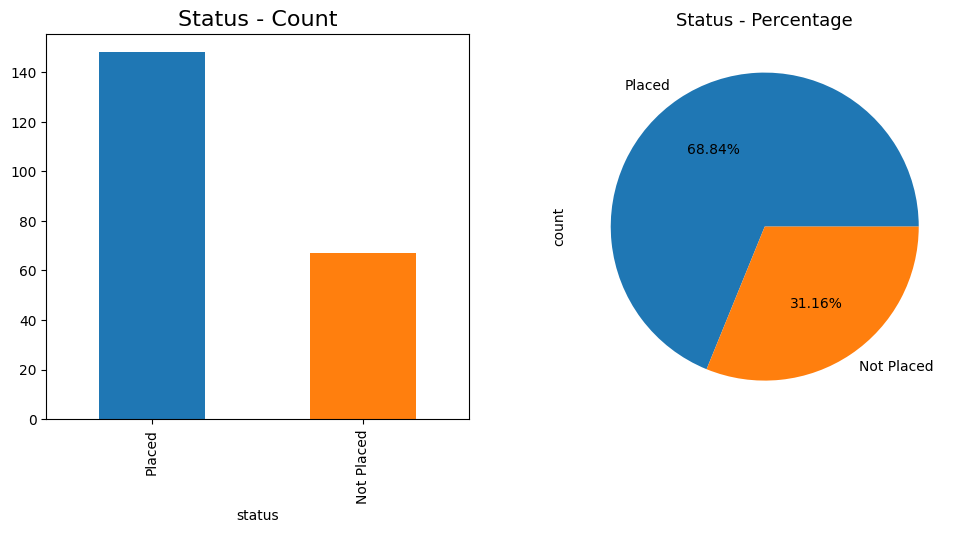

In [33]:
# Status
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
df['status'].value_counts().plot(kind='bar',color=sns.color_palette("tab10"))
plt.title("Status - Count", fontsize=16)

plt.subplot(1,2,2)
df['status'].value_counts().plot(kind='pie',autopct='%.2f%%')
plt.title("Status - Percentage", fontsize=13)
plt.show()

terlihat jika status pekerja yang telah ditempatkan lebih besar dari yang tidak ditempatkan pada perusahaan, yaitu 68.84% atau lebih dari 50%. Dari 215 mahasiswa yang terdapat pada data.

### 1. Mencari Faktor yang mempengaruhi gaji seorang kandidat

pada kode ini akan memvisualisasikan data pada sumbu x yang diberikan oleh kolom 'workex', dengan memisahkan data berdasarkan kategori 'status' yang diwakilkan oleh warna (hue). 

<Axes: xlabel='workex', ylabel='Count'>

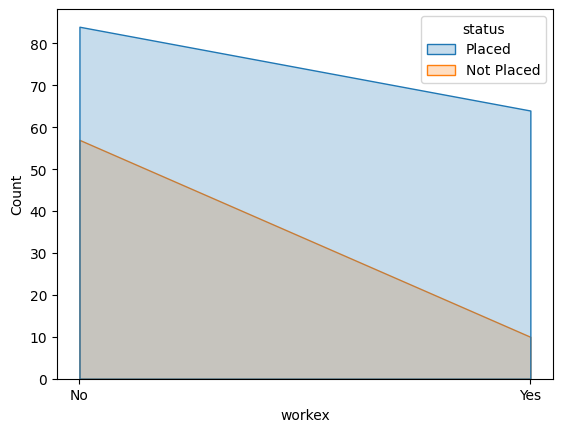

In [17]:
sns.histplot(data=df, x='workex', hue='status', stat='count',element='poly')
#stat=count mengatur jenis dari histogramnya

##### Mencari pengalaman kerja kandidat berdasarkan gender secara spesifik yaitu laki laki dan perempuan.

<Axes: xlabel='workex', ylabel='Count'>

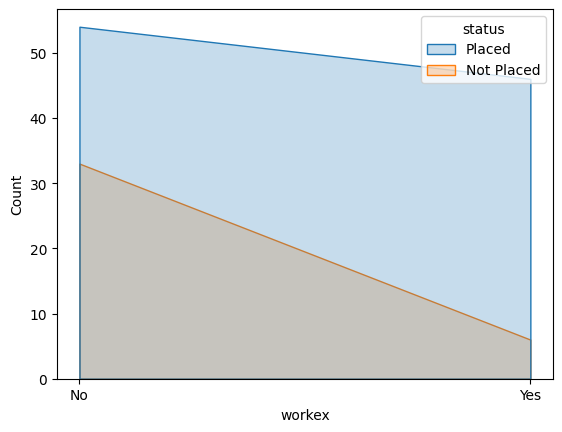

In [18]:
sns.histplot(data=df[df['gender']=='M'], x='workex', hue='status', stat='count',element='poly')

<Axes: xlabel='workex', ylabel='Count'>

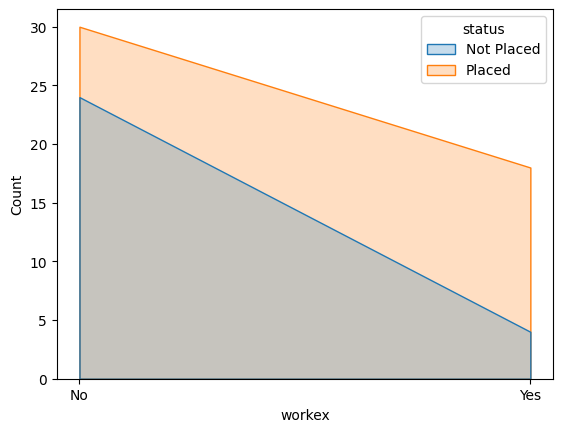

In [19]:
sns.histplot(data=df[df['gender']=='F'], x='workex', hue='status', stat='count',element='poly')

##### menghitung jumlah laki laki dan perempuan yang ditempatkan dan tidak dari variabel status dan gender.

In [20]:
pd.crosstab(df['gender'], df['status'])

status,Not Placed,Placed
gender,,
F,28,48
M,39,100


Melakukan visualisasi menggunakan diagram batang

<Axes: xlabel='status', ylabel='count'>

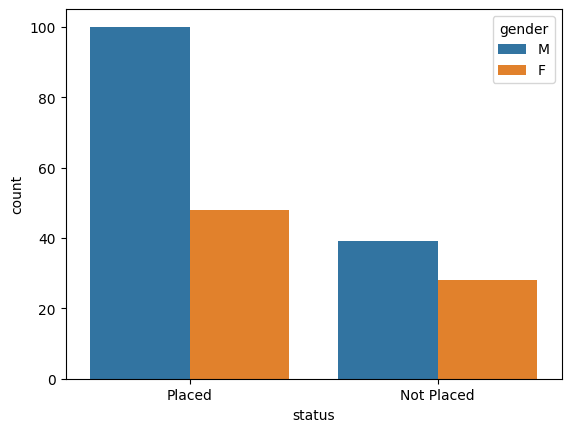

In [21]:
sns.countplot(data=df, x='status', hue='gender')

##### menghitung jumlah kandidat yang ditempatkan pada perusahaan dilihat dari memiliki pengalaman kerja dan tidak.

In [22]:
pd.crosstab(df['workex'], df['status'])

status,Not Placed,Placed
workex,,
No,57,84
Yes,10,64


melakukan visualisasi menggunakan diagram batang

<Axes: xlabel='workex', ylabel='count'>

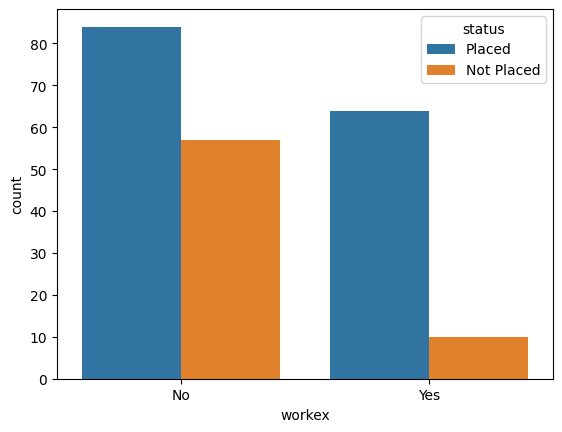

In [23]:
sns.countplot(data=df, x='workex', hue='status')

##### Menghitung jumlah spesialisasi yang ditempatkan sehingga dapat mengetahui seberapa banyak perusahaan menerima dan butuh kandidat dari spesialisasi yang ada.

In [24]:
pd.crosstab(df['specialisation'], df['status'])

status,Not Placed,Placed
specialisation,,
Mkt&Fin,25,95
Mkt&HR,42,53


melakukan visualisasinya dengan diagram batang.

<Axes: xlabel='specialisation', ylabel='count'>

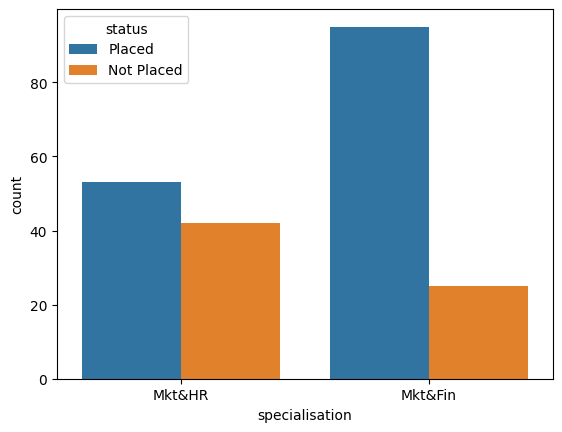

In [25]:
sns.countplot(data=df, x='specialisation', hue='status')

## Kesimpulan
karakteristik seorang yang berpengaruh dan memiliki kesempatan besar untuk direkrut dan ditempatkan dalam perusahaan yaitu specialis marketing dan finance "Mkt&Fin", Gender Laki - laki "M", dan memiliki pengalaman kerja "Yes"

### 2. Melakukan uji korelasi pada data
Buat variabel, berisi data yang bertipe numerik, yaitu 'float64' dan 'int64', menggunakan metode select_dtypes. Agar dapat dihitung nilai korelasinya.

In [34]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
df_numeric = df[numerical_columns]

##### Kemudian menghitung matriks korelasi antar variabel pada numerical_columns yang dibuat diatas.

In [35]:
correlation_matrix = df_numeric.corr()
print(correlation_matrix)

             sl_no     ssc_p     hsc_p  degree_p   etest_p     mba_p    salary
sl_no     1.000000 -0.078155 -0.085711 -0.088281  0.063636  0.022327  0.063764
ssc_p    -0.078155  1.000000  0.511472  0.538404  0.261993  0.388478  0.035330
hsc_p    -0.085711  0.511472  1.000000  0.434206  0.245113  0.354823  0.076819
degree_p -0.088281  0.538404  0.434206  1.000000  0.224470  0.402364 -0.019272
etest_p   0.063636  0.261993  0.245113  0.224470  1.000000  0.218055  0.178307
mba_p     0.022327  0.388478  0.354823  0.402364  0.218055  1.000000  0.175013
salary    0.063764  0.035330  0.076819 -0.019272  0.178307  0.175013  1.000000


Semakin dekat nilai korelasi antara dua variabel ke 1 atau -1, semakin kuat hubungan linear antara keduanya, sedangkan nilai mendekati 0 menunjukkan tidak adanya korelasi linear yang signifikan.

##### Melakukan visualisasi dengan mengguankan heatmap agar mempermudah dalam pembacaan hasil korelasi. semakin dekat dengan 1 atau -1 maka semakin kuat korelasinya.

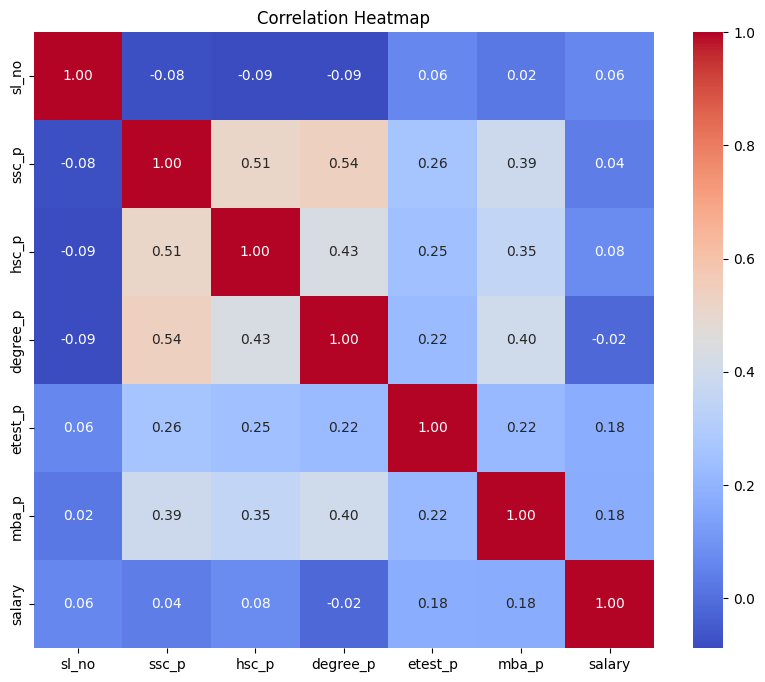

In [36]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()